# Lab 12.5: Unsupervised Learning

## 12.5.1: Principcal Component Analysis

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.4f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
usarrests = pd.read_csv('../datasets/USArrests.csv', index_col=0)

In [3]:
usarrests.mean()

Murder                   7.7880
Assault                170.7600
UrbanPop                65.5400
Rape                    21.2320
dtype: float64

In [4]:
usarrests.var()

Murder                  18.9705
Assault              6,945.1657
UrbanPop               209.5188
Rape                    87.7292
dtype: float64

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# using pipeline
# steps = [('scaler', StandardScaler()),
#          ('pca', PCA())]

# model = Pipeline(steps)

# model.fit(usarrests)

# without pipeline
scaler = StandardScaler()
usarrests_scaled = scaler.fit_transform(usarrests)

pca = PCA()
pca.fit(usarrests_scaled)

PCA()

In [6]:
scaler.mean_

array([  7.788, 170.76 ,  65.54 ,  21.232])

In [7]:
scaler.scale_

array([ 4.31173469, 82.50007515, 14.3292847 ,  9.27224762])

In [8]:
# rotation matrix

pd.DataFrame(pca.components_.T,
             index=usarrests.columns,
             columns=['PC' + str(i+1) for i in range(len(pca.components_))])

,PC1,PC2,PC3,PC4
Murder,0.5359,0.4182,-0.3412,0.6492
Assault,0.5832,0.1880,-0.2681,-0.7434
UrbanPop,0.2782,-0.8728,-0.3780,0.1339
Rape,0.5434,-0.1673,0.8178,0.0890


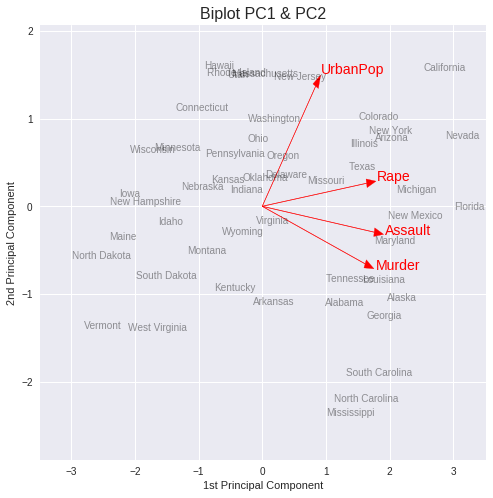

In [9]:
# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = -pca.components_[1]

xs = pca.transform(usarrests_scaled)[:,0] # see 'prcomp(my_data)$x' in R
ys = -pca.transform(usarrests_scaled)[:,1]

## visualize projections

plt.figure(figsize=(8, 8))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.1)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             usarrests.columns[i], color='r', size=14)

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    # plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i], ys[i], usarrests.index[i], color='black', alpha=0.4)
    
plt.title('Biplot PC1 & PC2', size=16)    
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

m = 0.5
plt.xlim(min(xs) - m, max(xs) + m)
plt.ylim(min(ys) - m, max(ys) + m);

In [10]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([2.53085875, 1.00996444, 0.36383998, 0.17696948]),
 array([0.62006039, 0.24744129, 0.0891408 , 0.04335752]))

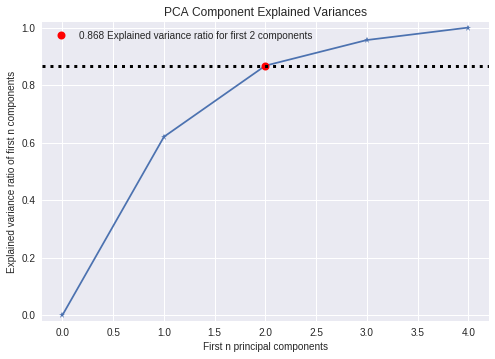

In [11]:
from scikitplot.decomposition import plot_pca_component_variance

plot_pca_component_variance(pca, target_explained_variance=0.8);

## 12.5.2 Matrix Completion

## 12.5.3 Clustering

### K-Means Clustering

In [12]:
np.random.seed(42)

x = np.random.normal(size=50*2).reshape(50, 2)
x[0:25, 0] += 3
x[25:50, 1] -= 4

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
kmeans.fit(x)

KMeans(n_clusters=2, n_init=20, random_state=42)

In [14]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

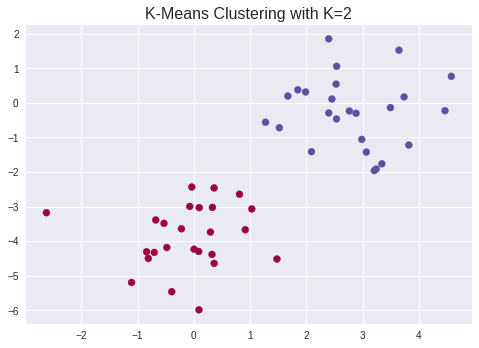

In [15]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='Spectral')
plt.title('K-Means Clustering with K=2', size=16);

In [16]:
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans2.fit(x)

KMeans(n_clusters=3, n_init=20, random_state=42)

In [17]:
kmeans2.cluster_centers_

array([[ 2.60450418,  0.24696837],
       [-0.09155989, -3.87287837],
       [ 3.27858059, -1.37217166]])

In [18]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=1)
kmeans3.fit(x)
kmeans4 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans4.fit(x)

print('inertia with n_init=1:', kmeans3.inertia_)
print('inertia with n_init=20:', kmeans4.inertia_)

inertia with n_init=1: 63.375640833186544
inertia with n_init=20: 62.737378097355716


### Hierarchical Clustering

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_complete = linkage(x, method='complete')
hc_average = linkage(x, method='average')
hc_single = linkage(x, method='single')

/home/dkapitan/.local/lib/python3.9/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


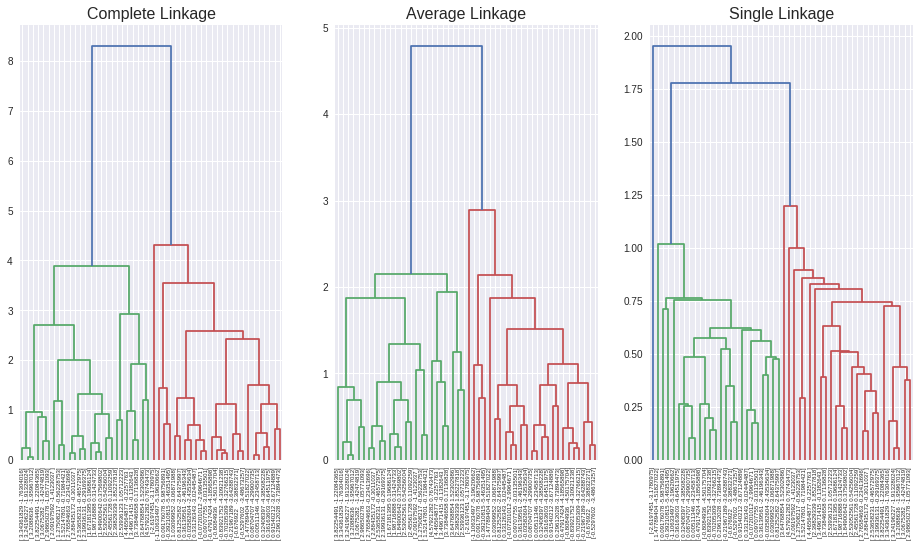

In [21]:
f, axes = plt.subplots(1, 3, sharex=False, sharey=False)

f.set_figheight(8)
f.set_figwidth(16)

dendrogram(hc_complete,
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[0])

dendrogram(hc_average,
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[1])

dendrogram(hc_single,
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[2])

axes[0].set_title('Complete Linkage', size=16)
axes[1].set_title('Average Linkage', size=16)
axes[2].set_title('Single Linkage', size=16);

In [22]:
from scipy.cluster.hierarchy import fcluster, cut_tree

In [23]:
cut_tree(hc_complete, 2).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [24]:
cut_tree(hc_average, 2).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [25]:
cut_tree(hc_single, 2).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [26]:
cut_tree(hc_single, 4).ravel()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

/home/dkapitan/.local/lib/python3.9/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


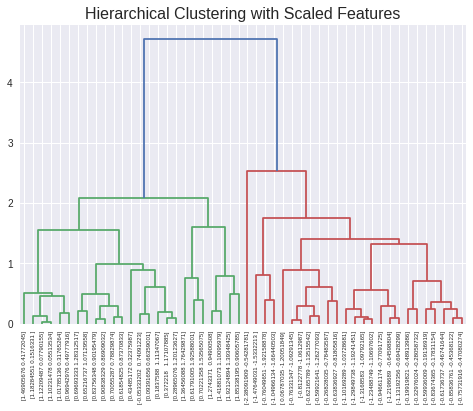

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

dendrogram(linkage(x_scaled, method='complete'),
           labels=x_scaled,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Hierarchical Clustering with Scaled Features', size=16);

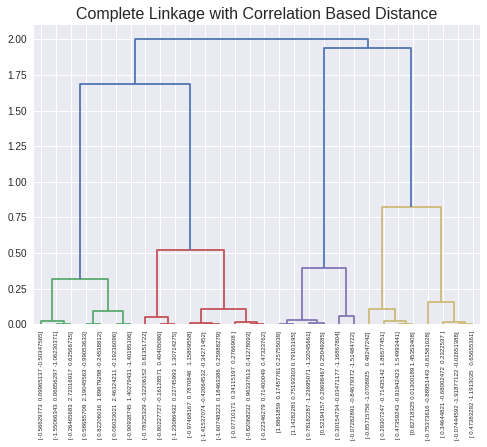

In [28]:
x = np.random.normal(size=30*3).reshape(30, 3)

# scipy linkage takes care of the distance function pdist
dendrogram(linkage(x, method='complete', metric='correlation'),
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Complete Linkage with Correlation Based Distance', size=16);

## 12.5.4: NCI60 Data Example

In [29]:
nci60 = pd.read_csv('../datasets/NCI60.csv', index_col=0)
nci_labs = nci60.labs
nci_data = nci60.drop('labs', axis=1)

nci_data.head()

,data.1,data.2,data.3,data.4,data.5,data.6,...,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
V1,0.3000,1.1800,0.5500,1.1400,-0.2650,-0.0700,...,0.6300,-0.0300,0.0000,0.2800,-0.3400,-1.9300
V2,0.6800,1.2900,0.1700,0.3800,0.4650,0.5800,...,0.1099,-0.8600,-1.2500,-0.7700,-0.3900,-2.0000
V3,0.9400,-0.0400,-0.1700,-0.0400,-0.6050,0.0000,...,-0.2700,-0.1500,0.0000,-0.1200,-0.4100,0.0000
V4,0.2800,-0.3100,0.6800,-0.8100,0.6250,-0.0000,...,-0.3500,-0.3000,-1.1500,1.0900,-0.2600,-1.1000
V5,0.4850,-0.4650,0.3950,0.9050,0.2000,-0.0050,...,0.6350,0.6050,0.0000,0.7450,0.4250,0.1450


In [30]:
nci_labs.head()

V1       CNS
V2       CNS
V3       CNS
V4     RENAL
V5    BREAST
Name: labs, dtype: object

In [31]:
nci_labs.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
              ..
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: labs, Length: 14, dtype: int64

### PCA on the NCI60 Data

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)

pca = PCA()
pca.fit(nci_scaled)

PCA()

In [33]:
x = pca.transform(nci_scaled)

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
color_index = le.fit_transform(nci_labs)

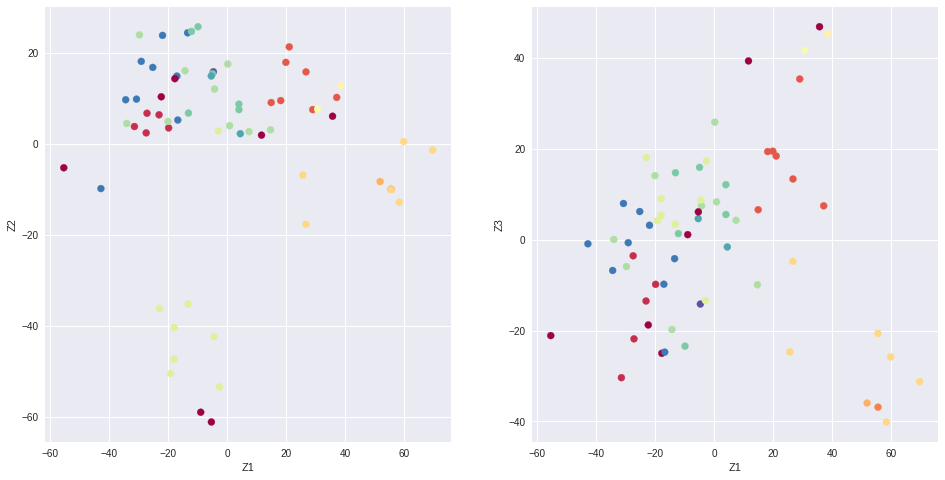

In [35]:
f, axes = plt.subplots(1, 2, sharex=False, sharey=False)

f.set_figheight(8)
f.set_figwidth(16)

axes[0].scatter(x[:, 0], -x[:, 1], c=color_index, cmap='Spectral')
axes[0].set_xlabel('Z1')
axes[0].set_ylabel('Z2')

axes[1].scatter(x[:, 0], x[:, 2], c=color_index, cmap='Spectral')
axes[1].set_xlabel('Z1')
axes[1].set_ylabel('Z3');

In [36]:
pca.explained_variance_ratio_[:5]

array([0.11358942, 0.06756203, 0.05751842, 0.04247554, 0.03734972])

In [37]:
pca.explained_variance_ratio_.cumsum()[:5]

array([0.11358942, 0.18115144, 0.23866987, 0.28114541, 0.31849513])

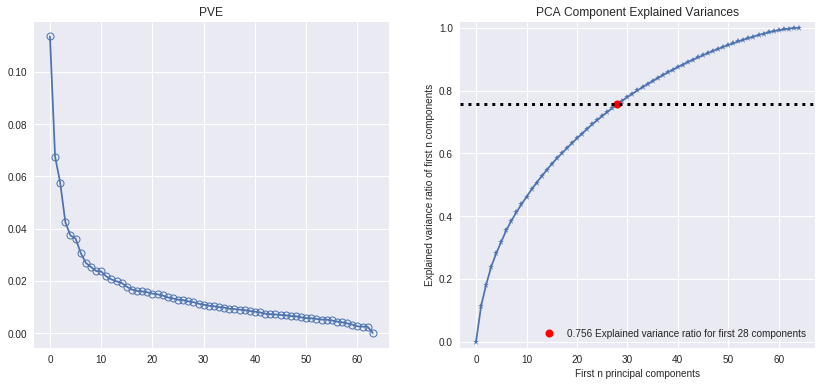

In [38]:
from scikitplot.decomposition import plot_pca_component_variance

f, axes = plt.subplots(1, 2, sharex=False, sharey=False)

f.set_figheight(6)
f.set_figwidth(14)

axes[0].plot(pca.explained_variance_ratio_, marker='o', markeredgewidth=1, markerfacecolor='None')
axes[0].set_title('PVE')
plot_pca_component_variance(pca, ax=axes[1]);

### Clustering the Observations of the NCI60 Data

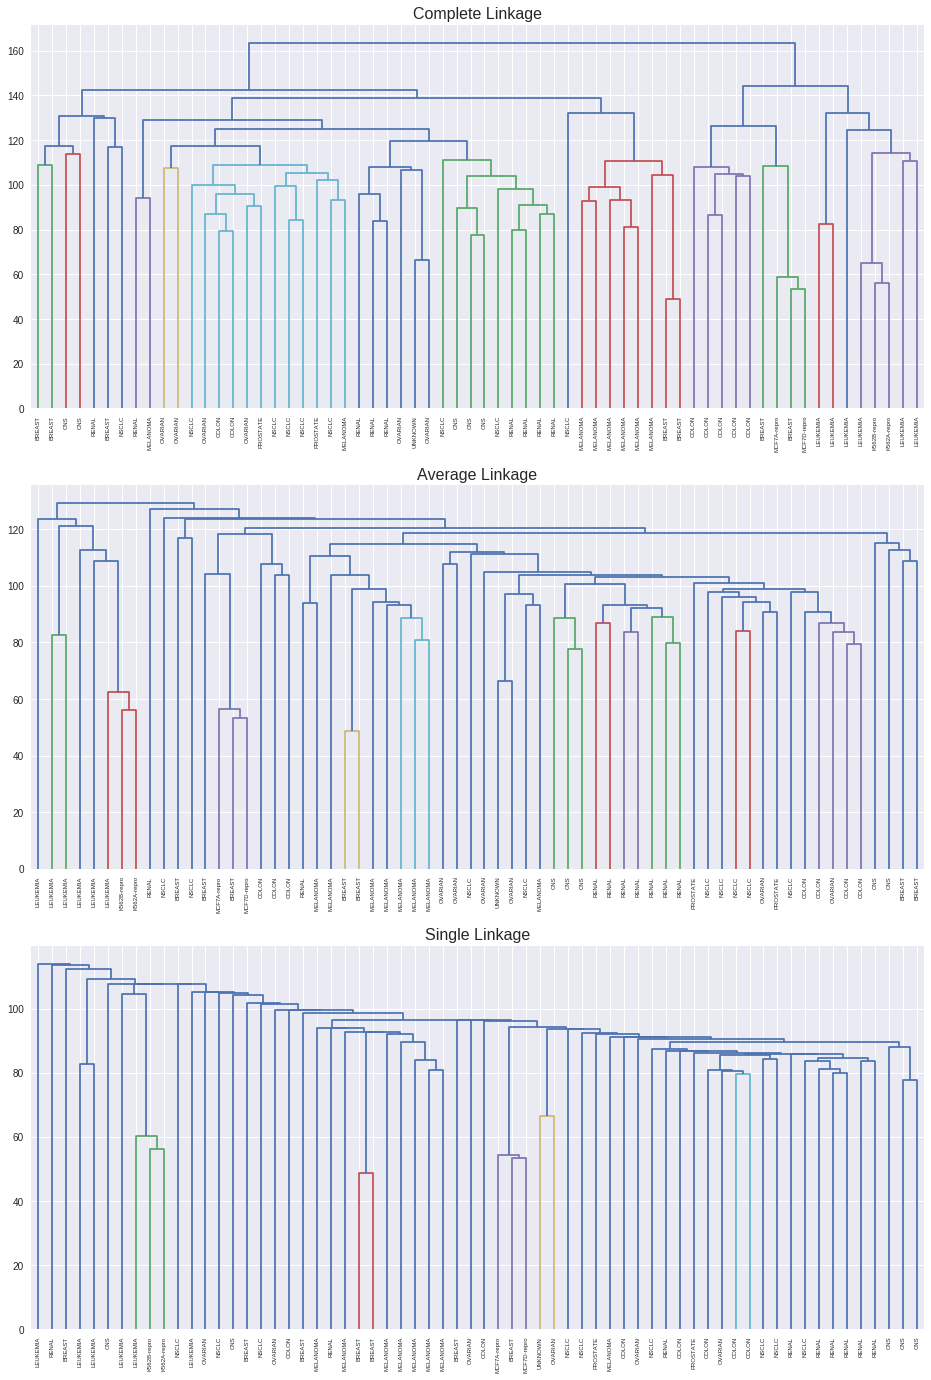

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

f, axes = plt.subplots(3, 1, sharex=False, sharey=False)

f.set_figheight(24)
f.set_figwidth(16)

dendrogram(linkage(nci_scaled, method='complete'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[0])

dendrogram(linkage(nci_scaled, method='average'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[1])

dendrogram(linkage(nci_scaled, method='single'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[2])

axes[0].set_title('Complete Linkage', size=16)
axes[1].set_title('Average Linkage', size=16)
axes[2].set_title('Single Linkage', size=16);

In [40]:
hc_clusters = cut_tree(linkage(nci_scaled, method='complete'), 4).ravel()
pd.crosstab(hc_clusters, nci_labs)

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,...,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,
0,2,3,2,0,0,0,...,8,8,6,2,8,1
1,3,2,0,0,0,0,...,0,1,0,0,1,0
2,0,0,0,1,1,6,...,0,0,0,0,0,0
3,2,0,5,0,0,0,...,0,0,0,0,0,0


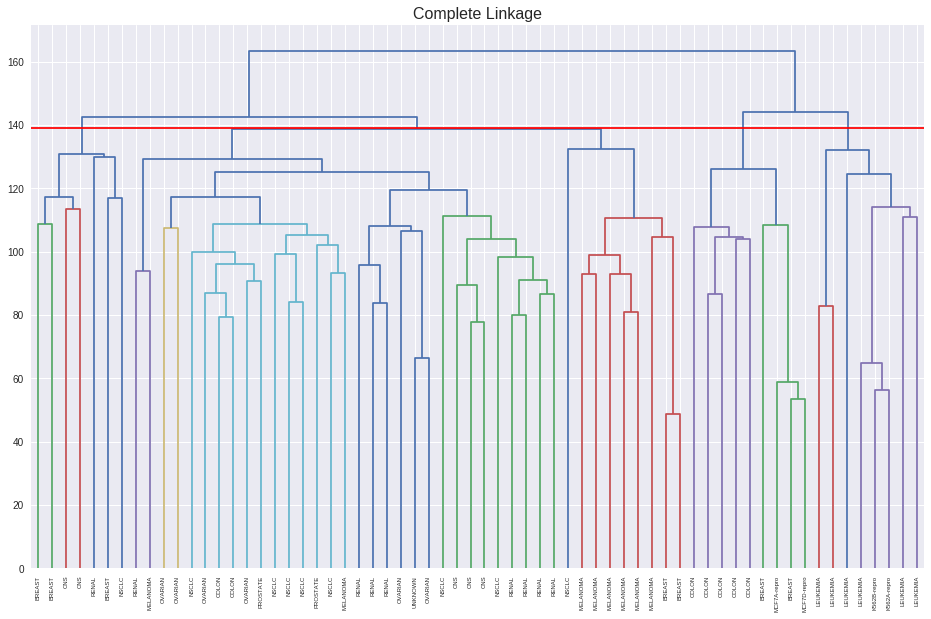

In [41]:
plt.figure(figsize=(16, 10))

dendrogram(linkage(nci_scaled, method='complete'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6)

plt.axhline(y=139, c='r')
plt.title('Complete Linkage', size=16);

In [42]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, n_init=20, random_state=42)
km.fit(nci_scaled)

pd.crosstab(km.labels_, hc_clusters)

col_0,0,1,2,3
row_0,,,,
0,9,0,0,0
1,9,0,0,8
2,22,7,0,0
3,0,0,8,1


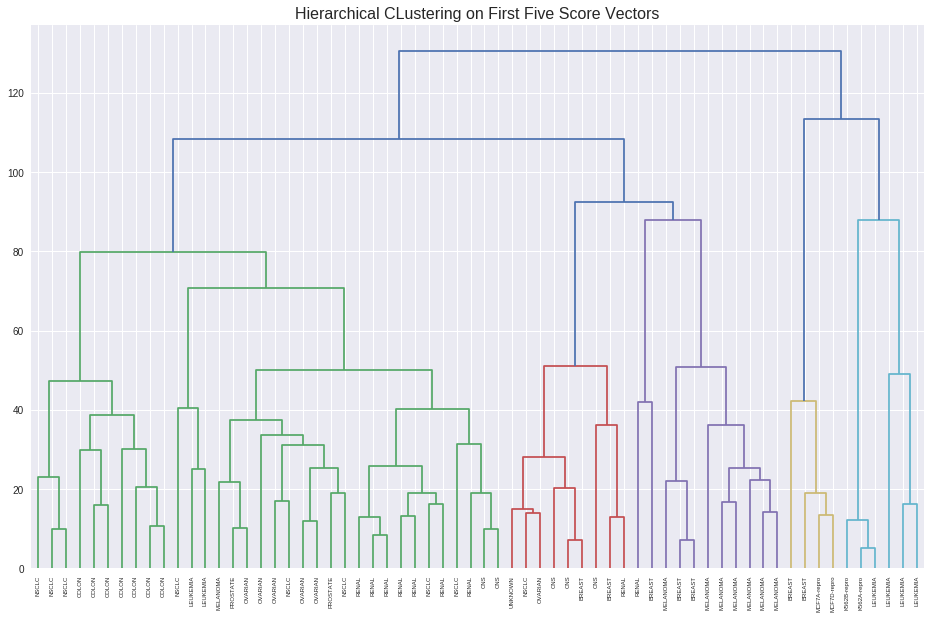

In [43]:
hc2 = linkage(x[:, 0:5], method='complete')

plt.figure(figsize=(16, 10))

dendrogram(hc2,
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Hierarchical CLustering on First Five Score Vectors', size=16);

In [44]:
pd.crosstab(cut_tree(hc2, 4).ravel(), nci_labs)

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,...,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,
0,0,2,7,0,0,2,...,1,8,5,2,7,0
1,5,3,0,0,0,0,...,7,1,1,0,2,1
2,0,0,0,1,1,4,...,0,0,0,0,0,0
3,2,0,0,0,0,0,...,0,0,0,0,0,0
